# Exercise 5: Support Vector Machines and RandomForests
## Theory
### Task 1: Derivation of the dual problem
---
Derive the Dual formulation of the SVM optimization problem. I.e.

Given 
 - $\underset{\alpha}{max}\big\{ \underset{w,b}{min}\{ \frac{1}{2}\lVert w\rVert^2 + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b)) \} \big\}, \alpha_i \geq 0,$ for all $i=1,...,m$,
 
show that a solution can be obtained by
 - $\underset{\alpha}{max} \sum_i \sum_j \alpha_i - \frac{1}{2} \alpha_i\alpha_jy_iy_j\langle\Phi(x_i), \Phi(x_j)\rangle$ 

subject to the constraints $\mathbf{\alpha} \geq 0 $ and $\sum_i\alpha_iy_i = 0$. 


### Solution:
---
Starting from
 - $\underset{\alpha}{max}\big\{ \underset{w,b}{min}\{ \frac{1}{2}\lVert w\rVert^2 + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b)) \} \big\}, \alpha_i \geq 0,$ for all $i=1,...,m$,
 
we first set the derivative of the inner term to zero, in order to minimize the inner problem analytically.

$\frac{\partial \frac{1}{2}\lVert w\rVert^2 + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b))}{\partial w} = w - \sum_{i=1}\alpha_i y_i \Phi(x_i) \overset{!}{=} 0$ 

$\implies w = \sum_{i=1}\alpha_i y_i \Phi(x_i)$


$\frac{\partial \frac{1}{2}\lVert w\rVert^2 + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b))}{\partial b} = - \sum_{i=1}\alpha_i y_i  \overset{!}{=} 0$ 

$\implies \sum_{i=1}\alpha_i y_i = 0$

Plugging in the primal variable $w$ into the original inner minimization problem, we obtain

 - $\frac{1}{2}\lVert w\rVert^2 + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b)) $

$ = w^Tw + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b))$

$ = \frac{1}{2} \underbrace{\sum_{i=1}\sum_{j=1}\alpha_i\alpha_j y_iy_j \Phi(x_i)^T\Phi(x_j)}_{w^Tw} + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b))$

$ = \frac{1}{2} \sum_{i=1}\sum_{j=1}\alpha_i\alpha_j y_iy_j \Phi(x_i)^T\Phi(x_j)_{w^Tw} - \sum_{i=1}\sum_{j=1}\alpha_i\alpha_j y_iy_j \Phi(x_i)^T\Phi(x_j)$

$ = -\frac{1}{2} \sum_{i=1}\sum_{j=1}\alpha_i\alpha_j y_iy_j \Phi(x_i)^T\Phi(x_j)_{w^Tw}$

subject to the constraints 
 - $\alpha_i \geq 0,$ for all $i=1,...,m$
given by the original optimization problem, and the contraints
 - $\sum_{i=1}\alpha_i y_i = 0$ from the derivate w.r.t $b$


### [Optional] Primal variables w,b from the dual solution
---
Show how the parameters $w$ and $b$ can be obtained from the solution of dual for predicting new points. Note: $b$ is tricky

### Solution
---
Show how the parameters $w$ and $b$ can be obtained from the solution of dual for predicting new points. Note: $b$ is tricky

 - $w = \sum_{i=1}\alpha_i y_i \Phi(x_i)$ is obtained directly from the dual derivation.

To obtain $b$, observe that, for support vectors, we have   
 - $\underset{i}{min} \{y_i(w^t\Phi(x_i)+b \} = 1 = \underset{i_{|y_i=1}}{min} \{y_i(w^t\Phi(x_i)+b \}$, 
 
where the last minimization is just over y_i=1, so that it is equal to 
 
 - $\underset{i_{|y_i=1}}{min} \{w^t\Phi(x)+b \}$
 
Then we get by pulling $b$ out of the minimization, as it is a constant, and plugging in $w =  \sum_{i=1}\alpha_i y_i \Phi(x_i)$ that 
 - $b = 1 - \underset{i_{|y_i=1}}{min} \{\sum_j \alpha_jy_j\Phi(x_j)^T\Phi(x_i)+b \}$

### Task 2: Hinge loss
---
The hinge loss is defined as 
 - $l_{hinge}(y, g(x)) = max(0, 1-yg(x))$

Show how we can inject it into the Soft Margin Primal Problem
- $\underset{w,b,\xi}{min} \frac{1}{2}\lVert w \rVert^2 + C \sum_i \xi_i$ s. t.

$y_i(w^T\Phi(x_i) + b) \geq 1 - \xi_i$ and $\xi_i \geq 0$.

to remove the constraints completely.

### Solution:
---
Define $g(x) = w^T\Phi(x) + b$. Then 
 - $\xi_i \geq  1- y_i\cdot g(x_i)
 \Leftrightarrow \xi_i = max(0, 1-y\cdot g(x)) =: l_{hinge},$

because $\xi_i$ is at most $0$.

So now we can replace $\xi_i$ in the objective function with $l_{hinge}$, and thereby incorporate the constraints in the objective itself:
 - $\underset{w,b,\xi}{min} \frac{1}{2}\lVert w \rVert^2 + C \sum_i l_{hinge}$
 
The implication is, L2 regularization can be geometrically interpreted as the penalty for small margin.

## Programming
---

### Task 1: Sklearn Warmup using toy datasets
---
**Task 1 SVC**
 - Train one sklearn.svm.SVC (Support Vector Classifier) model on the wine-dataset for each predefined kernel.
 - You can get the dataset via sklearn.datasets.load_wine.
 - Split the dataset into train and test data and report the kernel that performs best on the test data using the sklearn.metrics.accuracy_score metric
 - plot the confusion matrix

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

def do_exercise_one(load_fn):
  Xtrain, Xtest, ytrain, ytest = train_test_split(*load_fn(return_X_y=True), shuffle=True, random_state=12)
  print(f'Classification using SVC on the {load_fn.__name__} dataset')
  for kernel in ['rbf', 'linear', 'poly']:
    clf = OneVsRestClassifier(SVC(kernel=kernel)).fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    acc = accuracy_score(ypred, ytest)
    print(f'accuracy_score = {acc}, kernel = {kernel}')
    assert acc == clf.score(Xtest, ytest)
  # plot confusion_matrix
  ypred = OneVsRestClassifier(SVC(kernel='linear')).fit(Xtrain, ytrain).predict(Xtest)
  
  print(confusion_matrix(ytest, ypred))

do_exercise_one(load_wine)


Classification using SVC on the load_wine dataset
accuracy_score = 0.7555555555555555, kernel = rbf
accuracy_score = 0.9555555555555556, kernel = linear
accuracy_score = 0.7111111111111111, kernel = poly
[[19  0  0]
 [ 0 13  2]
 [ 0  0 11]]


### Sklearn Warmup using toy datasets:
---
**Task 1 RandomForest**
 - Train one sklearn.ensemble.RandomForestRegressor model on the diabetes-dataset for each predefined criterion.
 - You can get the dataset via sklearn.datasets.load_diabetes.
 - Split the dataset into train and test data and report the criterion that performs best on the test data using the sklearn.metrics.r2_score metric
 - plot the predicted against the true values

fitting RandomForestRegressor on diabetes dataset
finished fitting
R2 = -0.011634657673644133
score = 0.4755142058523225


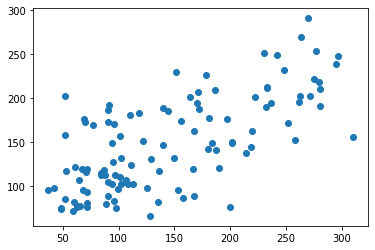

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def do_exercise_two():
  Xtrain, Xtest, ytrain, ytest = train_test_split(*load_diabetes(return_X_y=True), shuffle=True, random_state=42)
  print('fitting RandomForestRegressor on diabetes dataset')
  clf = RandomForestRegressor().fit(Xtrain, ytrain)
  print('finished fitting')
  ypred = clf.predict(Xtest)
  acc = r2_score(ypred, ytest)
  print(f'R2 = {acc}')
  print(f'score = {clf.score(Xtest, ytest)}')
  plt.scatter(ytest, ypred)
  plt.show()

do_exercise_two()


**Note:** In the warmup, you do not have to do any preprocessing. We will cover data preprocessing(standardization, feature selection, etc.) in the next lecture.

Similarly, you do not have to use cross validation or any sort of hyperparameter selection. You can for now use the default values of the estimators.
The according methods will be covered in the next lecture as well.

If your SVM is slow and your dataset not too big, scale data to [-1,1]

### [Optional] Multiclass classification
---
Apply the SVM to a multiclass classification problem of your choice

In [3]:
pass 

### Task 2: EEG Eye state dataset (Time series data)

In this exercise you will 
do classification on the EEG Eye state dataset. Sliding windows have already been applied to turn it into a supervised problem. You can familiarise yourself with it here: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

1. Load the data and labels and transform them into X, y in the format of sklearn toy datasets. (Tricky)

```python
from scipy.io import arff
with open('data/eyes.arff', mode='r') as f:
    # X, y = ...
    # Xtrain, Xtest, ytrain, ytest = ... 
    pass
```
2. Fit a RandomForest Classifier and SVC on the data after splitting it into train- and testset.
3. Report the best result. Can you tune the SVC to reach the performance of the random forest with default params?

In [4]:
# Load data and compute train test splits
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split

with open('data/eyes.arff', mode='r') as f:
  data, meta = arff.loadarff(f)
  n_samples = len(data)
  n_features = len(data[0])-1
  X = np.zeros((n_samples, n_features))
  y = np.zeros((n_samples,))
  for i, row in enumerate(data):
    X[i,:], y[i] = list(row)[:-1], row[-1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=42)

In [5]:
# fit classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

clf = SVC().fit(Xtrain, ytrain)
print('done fitting')
ypred_svc = clf.predict(Xtest)
forest = RandomForestClassifier().fit(Xtrain, ytrain)
ypred_rf = forest.predict(Xtest)

done fitting


In [6]:
# compare results, maybe tune SVC
print(f'acc SVC = {accuracy_score(ypred_svc, ytest)}')
print(f'acc RF= {accuracy_score(ypred_rf, ytest)}')


acc SVC = 0.7081441922563418
acc RF= 0.9188251001335114


### [Optional] Novelty detection using SVM
---
Novelty detection inspired by SVMs is done by finding the smalles enclosing sphere of the data, i.e. solving
 - $\underset{R,c}{min} R^2$ subject to the constraints
 $\lVert \Phi(x_i)-c\rVert^2 \leq R^2$

A point $x$ is then reported a novelty, if it exceeds a distance from the center:
$f(x) = sign(\lVert \Phi(x_i)-c\rVert - \tau)$
 
Familiarise yourself with the section on novelty detection via svms, by reading the corresponding section in the sklearn userguide
 - https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-detection

Pick a dataset from the Outlier Detection DataSets http://odds.cs.stonybrook.edu/ and try to find the outliers using sklearn.svm.OneClassSvm

You can report your findings, either by comparison or using plots.

In [8]:
from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
content_dict = loadmat('./data/glass.mat')
X, y = content_dict['X'],  content_dict['y']
Xtrain, Xtest, ytrain, ytest = X[:175], X[175:], y[:175], y[175:]

scaler = StandardScaler().fit(Xtrain)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
nus = [.01, .1, .5, .9, .99]
Xtrain = scaler.transform(Xtrain)
from sklearn.ensemble import IsolationForest
best_params = dict()
best_f1_score = -np.inf
recall = np.inf
for kernel in kernels:
  for nu in nus:
    clf = OneClassSVM(nu=nu,kernel=kernel).fit(Xtrain, ytrain)
    vals = clf.decision_function(scaler.transform(Xtest))
    scores = clf.score_samples(scaler.transform(Xtest))

    vals = np.abs(vals)
    pred = clf.predict(scaler.transform(Xtest)).clip(min=0)  # replace -1 with 0 to be able to compute metrics
    current_f1_score = f1_score(ytest, pred)
    if current_f1_score > best_f1_score:
      best_params = {'kernel': kernel, 'nu': nu}
      best_f1_score = current_f1_score
      recall = recall_score(ytest, pred)

print(f'best performance: {best_params}')
print(f'final f1_score = {best_f1_score} with recall = {recall}')

best performance: {'kernel': 'sigmoid', 'nu': 0.5}
final f1_score = 0.782608695652174 with recall = 1.0
